# Part A

In [ ]:
import pandas as pd
import numpy as np
path = "C:/Users/patha/Downloads/heart.dat"
import warnings
warnings.filterwarnings('ignore')

## Task 1

In [ ]:

columns = [
    "age", "sex", "chest pain type", "resting blood pressure",
    "serum cholestoral in mg/dl", "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results", "maximum heart rate achieved",
    "exercise induced angina", "oldpeak", "the slope of the peak exercise ST segment",
    "number of major vessels colored by flourosopy", "thal", "absence/presence of disease"
]

df = pd.read_csv(path, header=None,delimiter=' ',names=columns)
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,absence/presence of disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [ ]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral in mg/dl', 'fasting blood sugar > 120 mg/dl',
       'resting electrocardiographic results', 'maximum heart rate achieved',
       'exercise induced angina', 'oldpeak',
       'the slope of the peak exercise ST segment',
       'number of major vessels colored by flourosopy', 'thal',
       'absence/presence of disease'],
      dtype='object')

## Task 1A

In [ ]:
# preprocessing the dataset for the classification purpose

len(df)

270

In [ ]:
# checking the number of null values in the dataset.

df.describe()

for i in columns:
  print(f"The number of null values in the column {i} are {df[i].isna().sum()}")

# We can see that there are no null values in the columns

The number of null values in the column age are 0
The number of null values in the column sex are 0
The number of null values in the column chest pain type are 0
The number of null values in the column resting blood pressure are 0
The number of null values in the column serum cholestoral in mg/dl are 0
The number of null values in the column fasting blood sugar > 120 mg/dl are 0
The number of null values in the column resting electrocardiographic results are 0
The number of null values in the column maximum heart rate achieved are 0
The number of null values in the column exercise induced angina are 0
The number of null values in the column oldpeak are 0
The number of null values in the column the slope of the peak exercise ST segment are 0
The number of null values in the column number of major vessels colored by flourosopy are 0
The number of null values in the column thal are 0
The number of null values in the column absence/presence of disease are 0


In [ ]:
# correlation of the columns with the target column

df_corr=df[df.columns[0:]].corr()['absence/presence of disease'][:]
print(df_corr)

age                                              0.212322
sex                                              0.297721
chest pain type                                  0.417436
resting blood pressure                           0.155383
serum cholestoral in mg/dl                       0.118021
fasting blood sugar > 120 mg/dl                 -0.016319
resting electrocardiographic results             0.182091
maximum heart rate achieved                     -0.418514
exercise induced angina                          0.419303
oldpeak                                          0.417967
the slope of the peak exercise ST segment        0.337616
number of major vessels colored by flourosopy    0.455336
thal                                             0.525020
absence/presence of disease                      1.000000
Name: absence/presence of disease, dtype: float64


In [ ]:
# dropping the columns which have a lower absolute correlation score than 0.4
correlation_threshold=0.3
correlation_matrix= df.corr()
target_correlation=correlation_matrix['absence/presence of disease'].abs()
low_correlation_columns=target_correlation[target_correlation < correlation_threshold].index.to_list()
df.drop(columns=low_correlation_columns, inplace=True)

In [ ]:
df.columns

Index(['chest pain type', 'maximum heart rate achieved',
       'exercise induced angina', 'oldpeak',
       'the slope of the peak exercise ST segment',
       'number of major vessels colored by flourosopy', 'thal',
       'absence/presence of disease'],
      dtype='object')

In [ ]:
# now, let us normalize the values by performing the min-max normalization to the dataframe

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
columns_for_scaling=df.columns.tolist()[:-1]
df[columns_for_scaling]=scaler.fit_transform(df[columns_for_scaling])

In [ ]:
df.head()

,chest pain type,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,absence/presence of disease
0,1.000000,0.290076,0.0,0.387097,0.5,1.000000,0.0,2
1,0.666667,0.679389,0.0,0.258065,0.5,0.000000,1.0,1
2,0.333333,0.534351,0.0,0.048387,0.0,0.000000,1.0,2
3,1.000000,0.259542,1.0,0.032258,0.5,0.333333,1.0,1
4,0.333333,0.381679,1.0,0.032258,0.0,0.333333,0.0,1


## Task 2A

In [ ]:
# implementing RandomForest Classifier for performing the binary classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

X=df.iloc[:,:-1]
y=df['absence/presence of disease']
rfc=RandomForestClassifier(n_estimators=100, criterion='entropy')

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, test_size=0.2)

rfc.fit(X_train,y_train)




RandomForestClassifier(criterion='entropy')

In [ ]:
len(X),len(y)

(270, 270)

In [ ]:
# now training the model of Support Vector Classifier

from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

In [ ]:
#using Naive Bayes models for the classification purpose

from sklearn.naive_bayes import GaussianNB, MultinomialNB

gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,y_train)

multinomial_nb=MultinomialNB()
multinomial_nb.fit(X_train,y_train)

y_pred_gaussian_nb=gaussian_nb.predict(X_test)
y_pred_multinomial_nb=multinomial_nb.predict(X_test)

In [ ]:
# Evaluating the models based on the metric scores

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

models={
    "Random forest classifier": rfc,
    "Support Vector Classifier":svc,
    "Guassian Naive Bayes":gaussian_nb,
    "Multinomial Naive Bayes":multinomial_nb
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculating the different scores for the models that we have trained
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    c_matrix = confusion_matrix(y_test, y_pred)

    print(f"Below are the scores for the model {name}")
    print(f"The precision score is {precision}")
    print(f"The recall score is {recall}")
    print(f"The accuracy score is {accuracy}")
    print(f"The classification report is:\n{class_report}")
    print(f"the C_Matrix is: {c_matrix}\n")


Below are the scores for the model Random forest classifier
The precision score is 0.8157894736842105
The recall score is 0.9393939393939394
The accuracy score is 0.8333333333333334
The classification report is:
              precision    recall  f1-score   support

           1       0.82      0.94      0.87        33
           2       0.88      0.67      0.76        21

    accuracy                           0.83        54
   macro avg       0.85      0.80      0.81        54
weighted avg       0.84      0.83      0.83        54

the C_Matrix is: [[31  2]
 [ 7 14]]

Below are the scores for the model Support Vector Classifier
The precision score is 0.8285714285714286
The recall score is 0.8787878787878788
The accuracy score is 0.8148148148148148
The classification report is:
              precision    recall  f1-score   support

           1       0.83      0.88      0.85        33
           2       0.79      0.71      0.75        21

    accuracy                           0.81    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(probability=True, random_state=42)
nb_model = GaussianNB()

# Train models
f1 = rf_model.fit(X_train, y_train)
f2 = svc_model.fit(X_train, y_train)
f3 = nb_model.fit(X_train, y_train)


## Task 2B

In [ ]:
import numpy as np

# Example y_pred and y_test
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# Define costs (adjust based on your specific problem)
FP_cost = 5
FN_cost = 1

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=[1, 2])

# Assign costs based on confusion matrix
FP = cm[0, 1]  # False positives
FN = cm[1, 0]  # False negatives

# Construct cost matrix
cost_matrix = np.array([[0, FN_cost], [FP_cost, 0]])

print("Confusion Matrix:")
print(cm)
print("\nCost Matrix:")
print(cost_matrix)


Confusion Matrix:
[[30  3]
 [ 5 16]]

Cost Matrix:
[[0 1]
 [5 0]]


In [ ]:
import numpy as np
from costcla.metrics import cost_loss
from sklearn.metrics import accuracy_score

y_true = np.array([2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2])
y_pred = np.array([2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2])

# Assuming your cost matrix should be adjusted based on the provided values of y_true and y_pred
cost_matrix = np.zeros((len(y_true), 4))

for i in range(len(y_true)):
    if y_true[i] == 1 and y_pred[i] == 1:
        cost_matrix[i] = [0, 0, 0, 1]  # True positive
    elif y_true[i] == 1 and y_pred[i] == 2:
        cost_matrix[i] = [0, 1, 0, 0]  # False negative
    elif y_true[i] == 2 and y_pred[i] == 1:
        cost_matrix[i] = [5, 0, 0, 0]  # False positive
    elif y_true[i] == 2 and y_pred[i] == 2:
        cost_matrix[i] = [0, 0, 0, 1]  # True negative


# Function to evaluate models and calculate cost loss
def evaluate_model(model, X_test, y_test, cost_matrix):
    # Calculate predictions
    y_pred = model.predict(X_test)


    # Calculate accuracy for reference
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")

    # Print shapes (for debugging purposes)
    print(f"Shapes: y_true={y_true.shape}, y_pred={y_pred.shape}, cost_matrix={cost_matrix.shape}")

    # Calculate cost loss using cost_loss function
    try:
        cost = cost_loss(y_true, y_pred, cost_matrix)
    except ValueError as e:
        print(f"Error: {e}")
        cost = None

    return cost

# Example of how to use the evaluate_model function:
# Assuming you have trained models rf_model, svc_model, nb_model and data X_test, y_test
# Evaluate RandomForest
rf_cost = evaluate_model(rf_model, X_test, y_test, cost_matrix)

# Evaluate SVC
svc_cost = evaluate_model(svc_model, X_test, y_test, cost_matrix)

# Evaluate NaiveBayes
nb_cost = evaluate_model(nb_model, X_test, y_test, cost_matrix)

# Print results
print("RandomForest Cost:", rf_cost)
print("SVC Cost:", svc_cost)
print("NaiveBayes Cost:", nb_cost)


Model Accuracy: 0.81
Shapes: y_true=(54,), y_pred=(54,), cost_matrix=(54, 4)
Model Accuracy: 0.81
Shapes: y_true=(54,), y_pred=(54,), cost_matrix=(54, 4)
Model Accuracy: 0.87
Shapes: y_true=(54,), y_pred=(54,), cost_matrix=(54, 4)
RandomForest Cost: 38.0
SVC Cost: 41.0
NaiveBayes Cost: 40.0


## Task 3A

Min y_pred_proba: 0.0, Max y_pred_proba: 0.96
Min calibrated_probs: 0.0, Max calibrated_probs: 1.0
Before calibration Brier score: 0.1325
After calibration Brier score: 0.4001


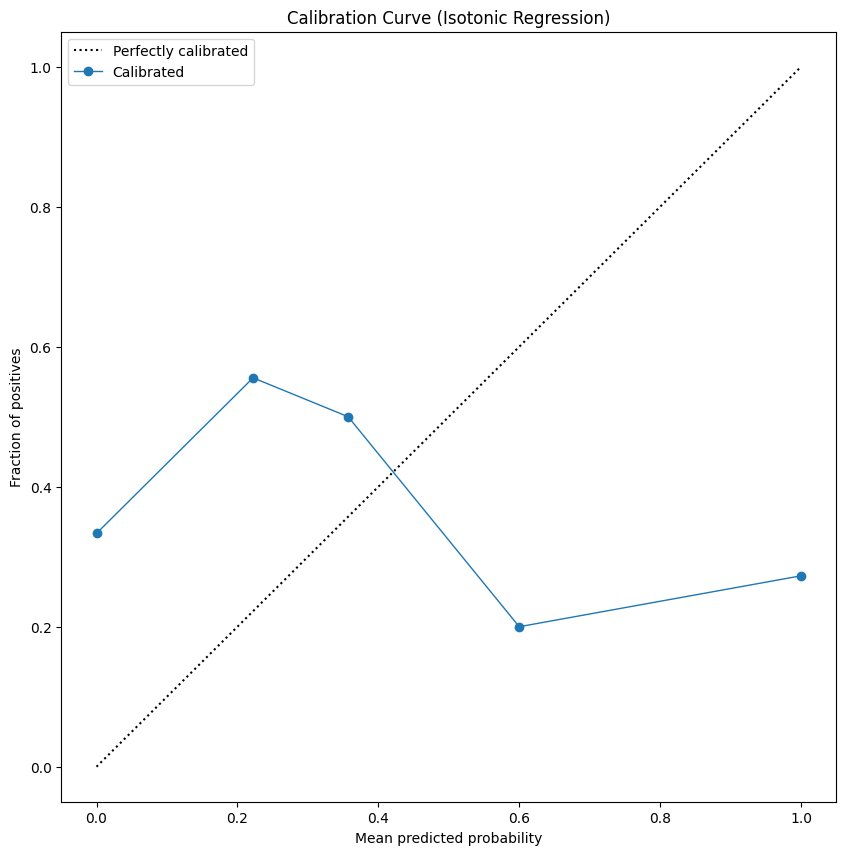

Min y_pred_proba: 0.06916963793364618, Max y_pred_proba: 0.9434474440157783
Min calibrated_probs: 0.0, Max calibrated_probs: 1.0
Before calibration Brier score: 0.1091
After calibration Brier score: 0.4658


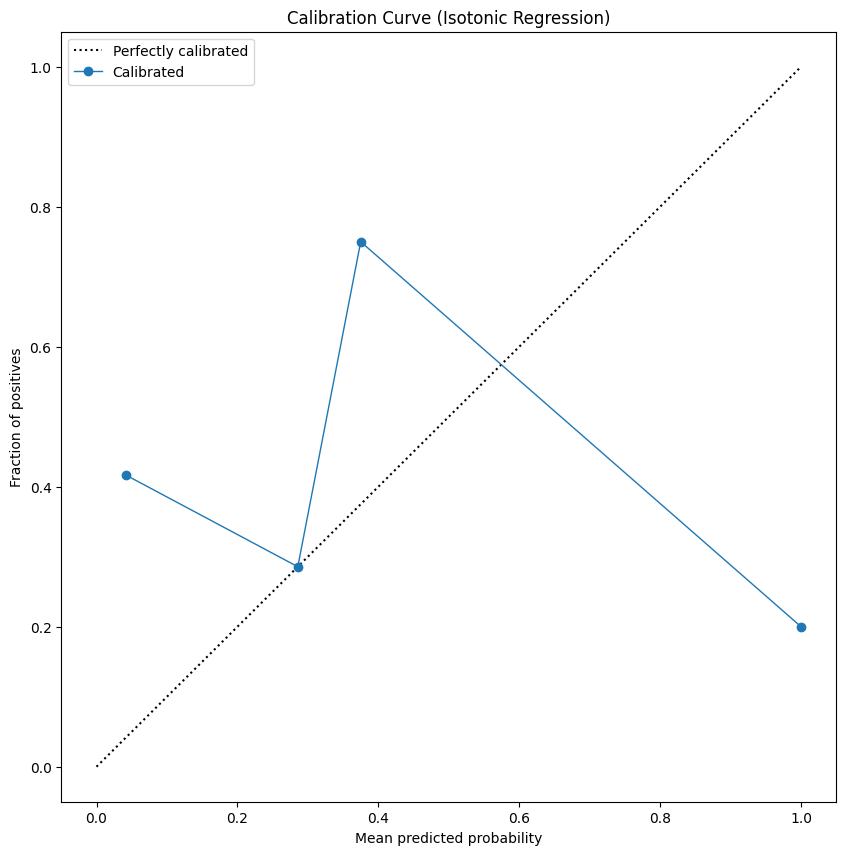

Min y_pred_proba: 0.0004988116920367599, Max y_pred_proba: 0.9999996725036117
Min calibrated_probs: 0.0, Max calibrated_probs: 1.0
Before calibration Brier score: 0.1156
After calibration Brier score: 0.4254


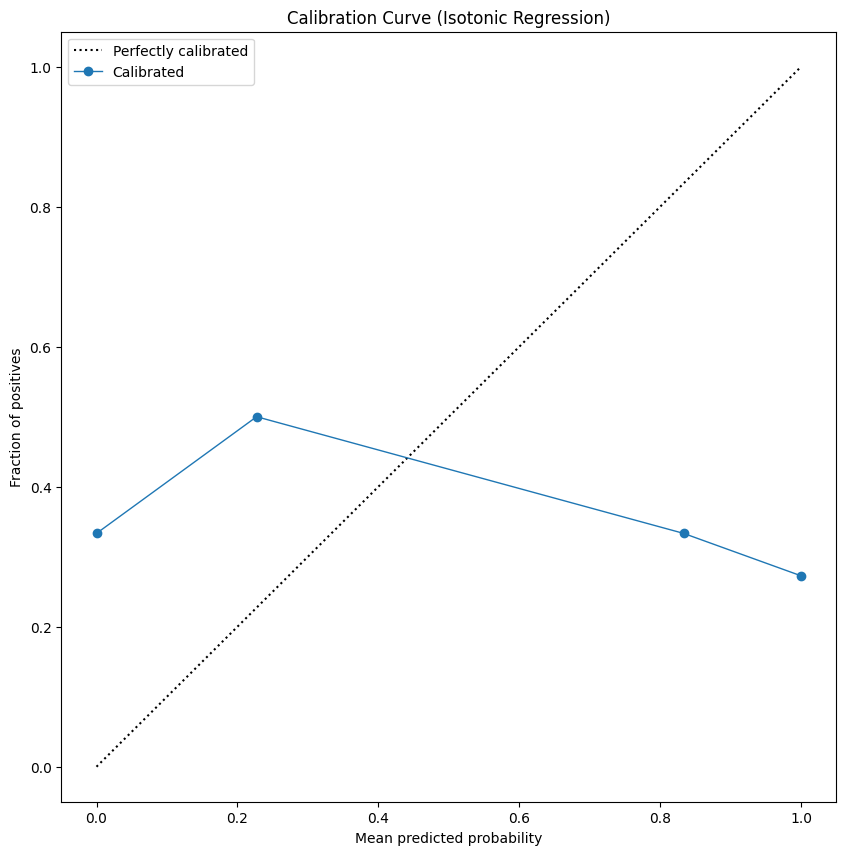

In [ ]:
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder
import numpy as np

def calculate_IReg(model, X_test, y_test):
    # Encode y_test if it contains non-binary values
    le = LabelEncoder()
    y_test_binary = le.fit_transform(y_test)

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming binary classification

    # Check values in y_pred_proba
    print(f"Min y_pred_proba: {y_pred_proba.min()}, Max y_pred_proba: {y_pred_proba.max()}")

    # Isotonic regression
    iso_reg = IsotonicRegression(out_of_bounds='clip')

    # Sorting y_pred_proba and y_test for isotonic regression
    sorted_indices = np.argsort(y_pred_proba)
    sorted_y_pred_proba = y_pred_proba[sorted_indices]
    sorted_y_test = y_test_binary[sorted_indices]

    calibrated_probs = iso_reg.fit_transform(sorted_y_pred_proba, sorted_y_test)

    # Check values in calibrated_probs
    print(f"Min calibrated_probs: {calibrated_probs.min()}, Max calibrated_probs: {calibrated_probs.max()}")

    # Ensure values are within [0, 1]
    y_pred_proba = np.clip(y_pred_proba, 0, 1)
    calibrated_probs = np.clip(calibrated_probs, 0, 1)

    # Calibration using Brier score
    brier_score_before = brier_score_loss(y_test_binary, y_pred_proba)
    brier_score_after = brier_score_loss(y_test_binary, calibrated_probs)
    print(f"Before calibration Brier score: {brier_score_before:.4f}")
    print(f"After calibration Brier score: {brier_score_after:.4f}")

    # Plotting the calibration curve
    plt.figure(figsize=(10, 10))
    plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    # Calibration curves' data
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_binary, calibrated_probs, n_bins=10)

    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Calibrated', linewidth=1)
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.legend()
    plt.title('Calibration Curve (Isotonic Regression)')
    plt.show()

    return calibrated_probs

rf_IReg = calculate_IReg(rf_model, X_test, y_test)
svc_IReg = calculate_IReg(svc_model, X_test, y_test)
nb_IReg = calculate_IReg(nb_model, X_test, y_test)


## Task 3B

In [ ]:
from costcla.models import BayesMinimumRiskClassifier
from costcla.metrics import cost_loss, savings_score
from sklearn.metrics import roc_curve
import numpy as np


def evaluate_with_BayesMinimumRisk(model, X_test, y_test,  cost_matrix):
    # Initialize BayesMinimumRiskClassifier
    le = LabelEncoder()
    y_test = le.fit_transform(y_test)
    bmr = BayesMinimumRiskClassifier()
    y_prob_test = model.predict_proba(X_test)
    y_pred_test_rf = model.predict(X_test)
    f_bmr = BayesMinimumRiskClassifier()
    f_bmr.fit(y_test, y_prob_test)
    y_pred_test_bmr  = f_bmr.predict(y_prob_test, cost_matrix)
    totalCost = cost_loss(y_test, y_pred_test_bmr, cost_matrix)
    return totalCost

# Evaluate models using BayesMinimumRiskClassifier
rf_cost = evaluate_with_BayesMinimumRisk(f1, X_test, y_test, cost_matrix)
svc_cost = evaluate_with_BayesMinimumRisk(f2, X_test, y_test, cost_matrix)
nb_cost = evaluate_with_BayesMinimumRisk(f3, X_test, y_test,  cost_matrix)

# Print results
print("RandomForest Cost after BayersMinimum:", rf_cost)
print("SVC Costafter BayersMinimum:", svc_cost)
print("NaiveBayes Cost after BayersMinimum:", nb_cost)


RandomForest Cost after BayersMinimum: 30.0
SVC Costafter BayersMinimum: 30.0
NaiveBayes Cost after BayersMinimum: 30.0


# Part B

## Task 1

In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/creditcard.csv"
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

# Libraries used for the task 2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


Mounted at /content/drive


In [ ]:
df=pd.read_csv(path)
df.convert_dtypes()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum().max()

0

In [ ]:
# Handling the Null Values!
df = df.dropna(inplace=False)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)

IQR = Q3-Q1
outliers_df=[]
outliers_df = df[(df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))]
print(f"Num of outliers for the column Amount: ", len(outliers_df))
df.drop(outliers_df.index, axis='index',inplace=True)
df.head()


Num of outliers for the column Amount:  31904


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [ ]:
df.count()

Time      252903
V1        252903
V2        252903
V3        252903
V4        252903
V5        252903
V6        252903
V7        252903
V8        252903
V9        252903
V10       252903
V11       252903
V12       252903
V13       252903
V14       252903
V15       252903
V16       252903
V17       252903
V18       252903
V19       252903
V20       252903
V21       252903
V22       252903
V23       252903
V24       252903
V25       252903
V26       252903
V27       252903
V28       252903
Amount    252903
Class     252903
dtype: int64

In [ ]:
print('No of Fraud Case i.e. (Class with val = 0) ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud Cases i.e. (Class with val = 1)', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No of Fraud Case i.e. (Class with val = 0)  99.84 % of the dataset
Fraud Cases i.e. (Class with val = 1) 0.16 % of the dataset


## Task 1A

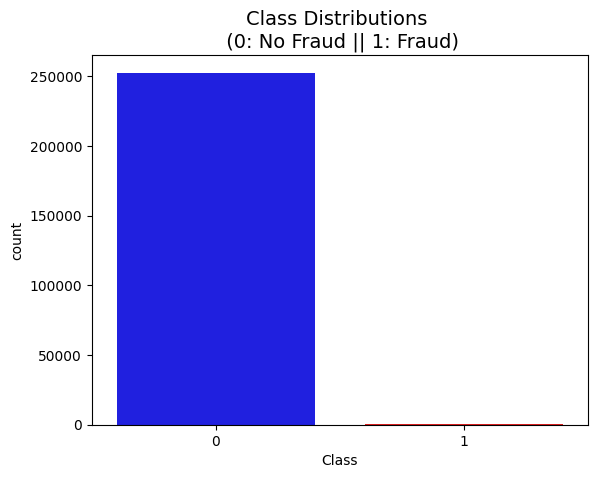

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Class', data=df, palette=['blue','red'])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

Our initial dataset has a huge imbalance! Not all of the transactions are fraudulent. Our algorithms may overfit since they will "assume" that the majority of transactions are not fraudulent if we utilize this dataframe as the foundation for our predictive models and analysis. We may also see a high number of errors. But rather than making assumptions, we want our model to look for patterns that indicate fraud!

Hence we will apply Feature Scaling techniques, there are two primary feature Scaling methods namely,:

1. Standardization

2. Normalization


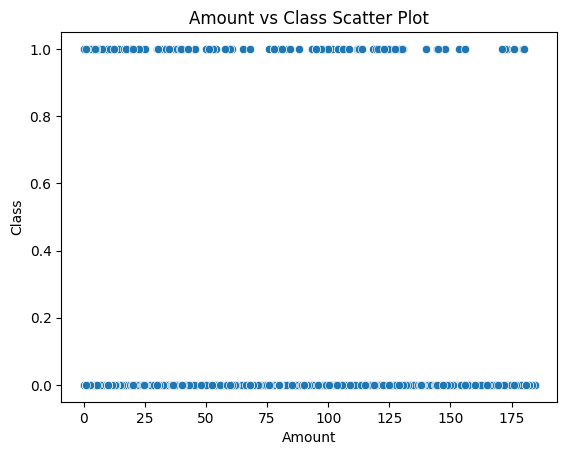

In [ ]:
sns.scatterplot(x='Amount', y='Class', data=df)
plt.title('Amount vs Class Scatter Plot')
plt.show()

 Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['normAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Amount'], inplace=True, axis=1)
print(f'Classes Count in Credit card Fraud Dataset \n', pd.value_counts(df['Class'], sort = True).sort_index())

Classes Count in Credit card Fraud Dataset 
 Class
0    252502
1       401
Name: count, dtype: int64


In [ ]:
df['normAmount'].head()

0    0.810949
1    0.014580
3    0.669377
4    0.379350
5    0.019892
Name: normAmount, dtype: float64

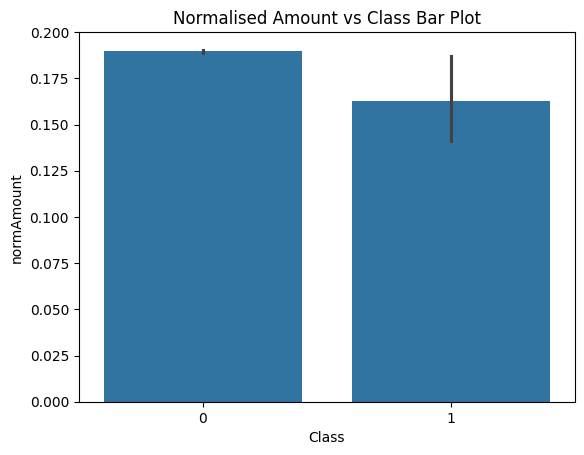

In [ ]:
sns.barplot(x='Class', y='normAmount', data=df)
plt.title('Normalised Amount vs Class Bar Plot')
plt.show()

In [ ]:
counter1 = 0
counter2 = 0
for i in df['Class']:
    if i == 1:
        counter1 += 1
    else:
      counter2 += 1
print("No of Fraud Cases in DataSet is:", counter1)
print("No of Non Fraud Cases in DataSet is:", counter2)

No of Fraud Cases in DataSet is: 401
No of Non Fraud Cases in DataSet is: 252502


## Task 2A

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=30)

In [ ]:
classifier_rf = RandomForestClassifier(random_state=30,n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)
stmt = classifier_rf.oob_score_*100
print(f'\nAccuracy of the Random Forest model by OOB Score is without the mitigation applied: {(stmt):.2f}%')
y_pred_rf = classifier_rf.predict(X_test)
accuracy = classifier_rf.score(X_test, y_test)
print(f"Accuracy of the Random Forest Classifier without Mitigation applied:{(accuracy*100):.2f}%" )


Accuracy of the Random Forest model by OOB Score is without the mitigation applied: 99.97%
Accuracy of the Random Forest Classifier without Mitigation applied:99.96%


In [ ]:
classifier_lvc = LinearSVC(random_state=30)
classifier_lvc.fit(X_train, y_train)
y_pred_lvc = classifier_lvc.predict(X_test)
accuracy = classifier_lvc.score(X_test, y_test)
print(f"Accuracy of the Linear SVC Classifier without Mitigation applied:{(accuracy*100):.2f}%")


Accuracy of the Linear SVC Classifier without Mitigation applied:99.87%


In [ ]:
classifier_gnb = GaussianNB()
classifier_gnb.fit(X_train, y_train)
y_pred_gnb = classifier_gnb.predict(X_test)
accuracy = classifier_gnb.score(X_test, y_test)
print(f"Accuracy of the Gaussian Naive Bayes Classifier without Mitigation applied:{(accuracy*100):.2f}%")


Accuracy of the Gaussian Naive Bayes Classifier without Mitigation applied:99.45%


## Task 2B

In [ ]:
# Calculate metrics for Random Forest
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')


# Print metrics
print("Random Forest Performance:\n")
print(f"Precision: {(rf_precision*100):.2f}%")
print(f"Recall: {(rf_recall*100):.2f}%")
print(f"F1 Score: {(rf_f1*100):.2f}%\n")

# Calculate metrics for Linear SVC
lvc_recall = recall_score(y_test, y_pred_lvc, average='weighted')
lvc_f1 = f1_score(y_test, y_pred_lvc, average='weighted')
lvc_precision = precision_score(y_test, y_pred_lvc, average='weighted')


# Print metrics
print("Linear SVC Performance:\n")
print(f"Precision: {(lvc_precision*100):.2f}%")
print(f"Recall: {(lvc_recall*100):.2f}%")
print(f"F1 Score: {(lvc_f1*100):.2f}%\n")


# Calculate metrics for Gaussian Naive Bayes classifier
gnb_recall = recall_score(y_test, y_pred_gnb, average='weighted')
gnb_f1 = f1_score(y_test, y_pred_gnb, average='weighted')
gnb_precision = precision_score(y_test, y_pred_gnb, average='weighted')


# Print metrics
print("Gaussian Naive Bayes classifier Performance:\n")
print(f"Precision: {(gnb_precision*100):.2f}%")
print(f"Recall: {(gnb_recall*100):.2f}%")
print(f"F1 Score: {(gnb_f1*100):.2f}%")


Random Forest Performance:

Precision: 99.96%
Recall: 99.96%
F1 Score: 99.96%

Linear SVC Performance:

Precision: 99.83%
Recall: 99.87%
F1 Score: 99.84%

Gaussian Naive Bayes classifier Performance:

Precision: 99.85%
Recall: 99.45%
F1 Score: 99.63%


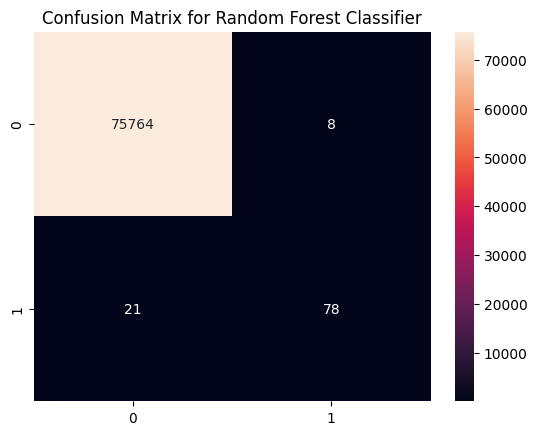


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75772
           1       0.91      0.79      0.84        99

    accuracy                           1.00     75871
   macro avg       0.95      0.89      0.92     75871
weighted avg       1.00      1.00      1.00     75871



In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
cm1 = confusion_matrix(y_test, y_pred_lvc)
cm2 = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()
print("\n "+classification_report(y_test, y_pred_rf))

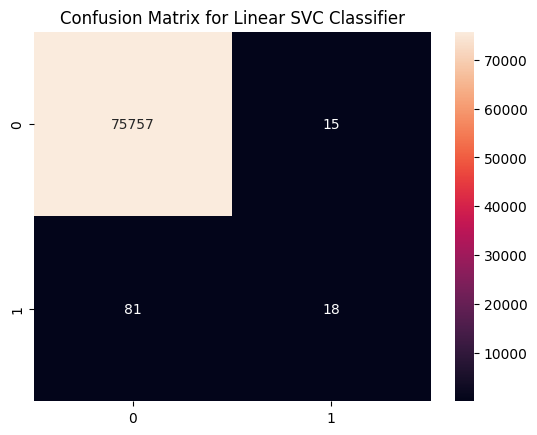


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75772
           1       0.55      0.18      0.27        99

    accuracy                           1.00     75871
   macro avg       0.77      0.59      0.64     75871
weighted avg       1.00      1.00      1.00     75871



In [ ]:
sns.heatmap(cm1, annot=True, fmt='d')
plt.title('Confusion Matrix for Linear SVC Classifier')
plt.show()
print("\n "+classification_report(y_test, y_pred_lvc))

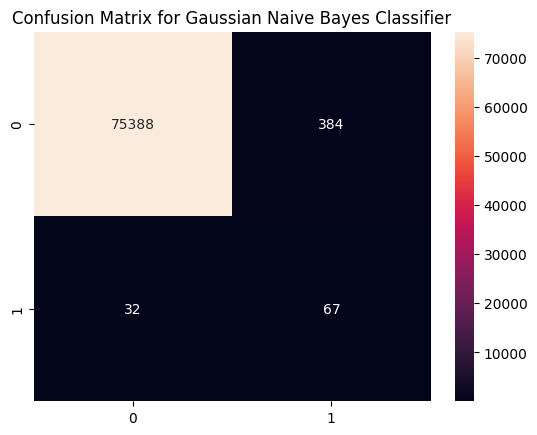


               precision    recall  f1-score   support

           0       1.00      0.99      1.00     75772
           1       0.15      0.68      0.24        99

    accuracy                           0.99     75871
   macro avg       0.57      0.84      0.62     75871
weighted avg       1.00      0.99      1.00     75871



In [ ]:
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()
print("\n "+classification_report(y_test, y_pred_gnb))

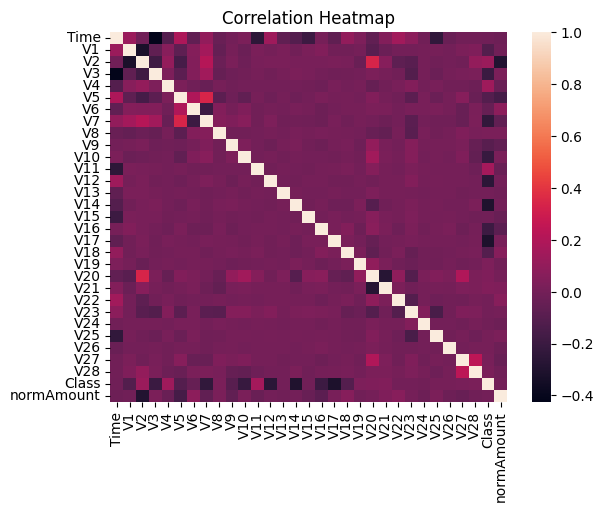

In [ ]:
# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Correlation Heatmap')
plt.show()

## Task 3A

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=30)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_smote)
print('After', counter)

Before Counter({0: 176730, 1: 302})
After Counter({0: 176730, 1: 176730})


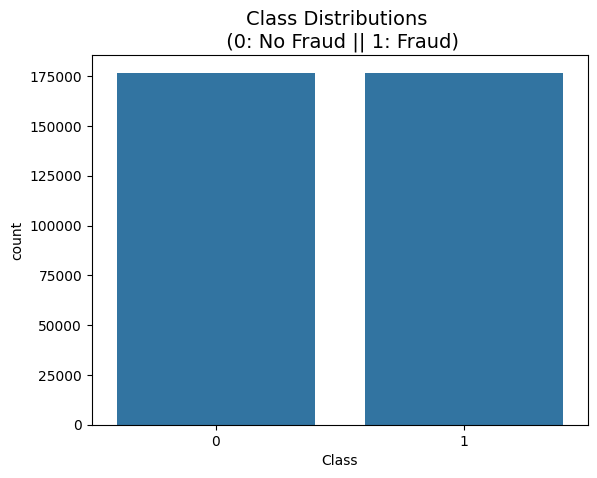

In [ ]:
sns.countplot(x=y_train_smote)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

After Over Sampling the data Using SMOTE both the Class are at almost Break-Even data points/ Observations. Total Observations are increased to the majority class' observations' sum.



In [ ]:
# Under Sampling using Near-Miss Version 3
nearmiss = NearMiss(version=3)
X_resampled_nearmiss, y_resampled_nearmiss = nearmiss.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_resampled_nearmiss)))

Resampled dataset shape Counter({0: 302, 1: 302})


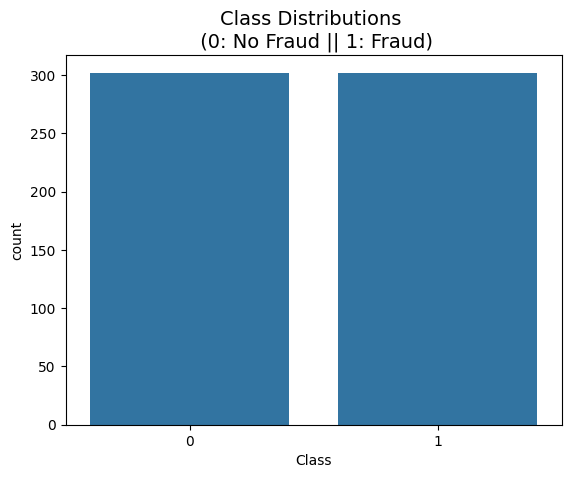

In [ ]:
sns.countplot(x=y_resampled_nearmiss)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

After Under Sampling the data Using Near Miss version 3.0 both the Class are at almost Break-Even data points/ Observations. And the Total Observations are reduced to the minority class' observations' sum.

## Task 3B

In [ ]:
# Simple Ensemble Classifier
from imblearn.ensemble import EasyEnsembleClassifier
easy_ensemble = EasyEnsembleClassifier(n_estimators=10, random_state=42)
easy_ensemble.fit(X_train, y_train)
y_pred_easy_ensemble = easy_ensemble.predict(X_test)
accuracy = easy_ensemble.score(X_test, y_test)
print(f"Accuracy of the Easy Ensemble Classifier without Mitigation applied:{(accuracy*100):.2f}%")

Accuracy of the Easy Ensemble Classifier without Mitigation applied:96.87%


In [ ]:
easy_ensemble = EasyEnsembleClassifier(n_estimators=10, random_state=42)
easy_ensemble.fit(X_train_smote, y_train_smote)
y_pred_easy_ensemble = easy_ensemble.predict(X_test)
accuracy = easy_ensemble.score(X_test, y_test)
print(f"Accuracy of the Easy Ensemble Classifier after SMOTE:{(accuracy*100):.2f}%")

Accuracy of the Easy Ensemble Classifier after SMOTE:99.08%


In [ ]:
easy_ensemble = EasyEnsembleClassifier(n_estimators=10, random_state=42)
easy_ensemble.fit(X_resampled_nearmiss, y_resampled_nearmiss)
y_pred_easy_ensemble = easy_ensemble.predict(X_test)
accuracy = easy_ensemble.score(X_test, y_test)
print(f"Accuracy of the Easy Ensemble Classifier after Near Miss:{(accuracy*100):.2f}%")

Accuracy of the Easy Ensemble Classifier after Near Miss:95.21%
